# AOL Machine learning

# Obesity Levels & Life Style

#### 1a. Introduction about the topic
During and after the COVID-19 pandemic, a survey conducted by Ipsos found that 62% of Americans believe their health is more important to them than before the pandemic (Broom, 2022). This means that people prioritized their health more than before the pandemic. However, in 2022, 2.5 billion adults were overweight, 890 million were living with obesity, and 390 million were underweight (WHO, 2024).

WHO (2024) stated that malnutrition refers to deficiencies, excessive, or imbalances in a person’s intake of energy, and nutrients. The 4 forms of malnutrition are undernutrition, micronutrient-related malnutrition, overweight and obesity, and diet-related noncommunicable diseases (WHO, 2024).

Due to this, this topic is chosen so that a machine learning algorithm is developed to predict which nutritional status a person is in so that they can mitigate the risk of undernutrition, overweight, or obesity.


## 1b. Describe the dataset that you have chosen

The dataset is taken from [kaggle](https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/notebook) where 77% of the data is synthetic
<table>
<tr>
<th>Column Name/Features</th>
<th>Description</th>
<th>Data Type</th>
</tr>
<tr>
<td>Gender</td>
<td>The gender of the individual</td>
<td>Categorical(Male, Female)</td>
</tr>
<tr>
<td>Age</td>
<td>The age of the individual</td>
<td>Numeric</td>
</tr>
<tr>
<td>Height</td>
<td>The height of the individual in meters</td>
<td>Numeric</td>
</tr>
<tr>
<td>Weight</td>
<td>The weight of the individual in Kilograms</td>
<td>Numeric</td>
</tr>
<tr>
<td>family_history_with_overweight</td>
<td>Historical record of the individual family member's with obesity</td>
<td>Categorical(yes, no)</td>
</tr>
<tr>
<td>FAVC (Frequent consumption of high caloric food)</td>
<td>Does the individual consumes high caloric food frequently</td>
<td>Categorical(yes, no)</td>
</tr>
<tr>
<td>FCVC (Frequency of consumption of vegetables)</td>
<td>Dies the individual frequently eat vegetables</td>
<td>Categorical(yes, no)</td>
</tr>
<tr>
<td>NCP (Number of main meals)</td>
<td>The number of main meals the individual consumes</td>
<td>Numeric</td>
</tr>
<tr>
<td>CAEC (Consumption of food between meals)</td>
<td>The frequency of the individual consuming snacks in between main meals</td>
<td>Categorical (No, Sometimes, Frequently, Always)</td>
</tr>
<tr>
<td>SMOKE</td>
<td>Smoking status of the individual</td>
<td>Categorical (yes, no)</td>
</tr>
<tr>
<td>CH2O (Daily water intake)</td>
<td>The number of water consumed by the individual in Liters</td>
<td>Numeric</td>
</tr>
<tr>
<td>SCC (Monitor calories consumption)</td>
<td>Does the individual monitor their calorie consumption</td>
<td>Categorical (yes, no)</td>
</tr>
<tr>
<td>FAF (Physical activity frequency)</td>
<td>The number of physical activities the individual did per week</td>
<td>Numeric</td>
</tr>
<tr>
<td>TUE (Time using technology devices)</td>
<td>The amount of time the individual spent on technological device in hours</td>
<td>Numeric</td>
</tr>
<tr>
<td>CALC (Alcohol consumption)</td>
<td>How frequent the individual drink alcohol</td>
<td>Categorical (no, sometimes, frequently, always)</td>
</tr>
<tr>
<td>MTRANS (Transportation used)</td>
<td>The type of transportation used by the individual for daily commute</td>
<td>Categorical</td>
</tr>
<tr>
<td>NObeyesdad (Obesity level)</td>
<td>Obesity level category of the individual</td>
<td>Categorical</td>
</tr>
</table>

## Importing the libraries needed

In [1]:

#Data manipulation libraries
import numpy as np
import pandas as pd

#Correlation test
from statsmodels.stats.outliers_influence import variance_inflation_factor

#plotting libraries
import matplotlib.pyplot as plt
import random #this will be used to generate color
import seaborn as sns

#sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Winsorizer
from feature_engine.outliers import Winsorizer
from scipy.stats.mstats import winsorize

#Machine learning libraries
## Neural Network (Proposed Model)
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Adadelta, SGD, Adagrad
from keras.utils import to_categorical

## random forest (Baseline Model)
from sklearn.ensemble import RandomForestClassifier

#to poerform gridsearch for each model
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv(".\\Dataset\\Obesity_data.csv")
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Performing EDA

#### Data types of the dataset

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Check For Duplicates

In [16]:
dataset.duplicated().sum()

24

There are some duplicates therefore we need to delete it.

#### Check for NA/Missing values

In [17]:
dataset.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

The dataset is clean from missing values but not duplicates.

In [18]:
#now we drop the duplicates
dataset = dataset.drop_duplicates()

In [19]:
dataset.duplicated().sum()

0

Now it is clean from duplicates

#### Splitting the dataset into numeric and categorical

In [20]:
numeric_data = dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(exclude=[np.number])

In [21]:
numeric_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [22]:
categorical_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


### Plotting the distribution for numeric data

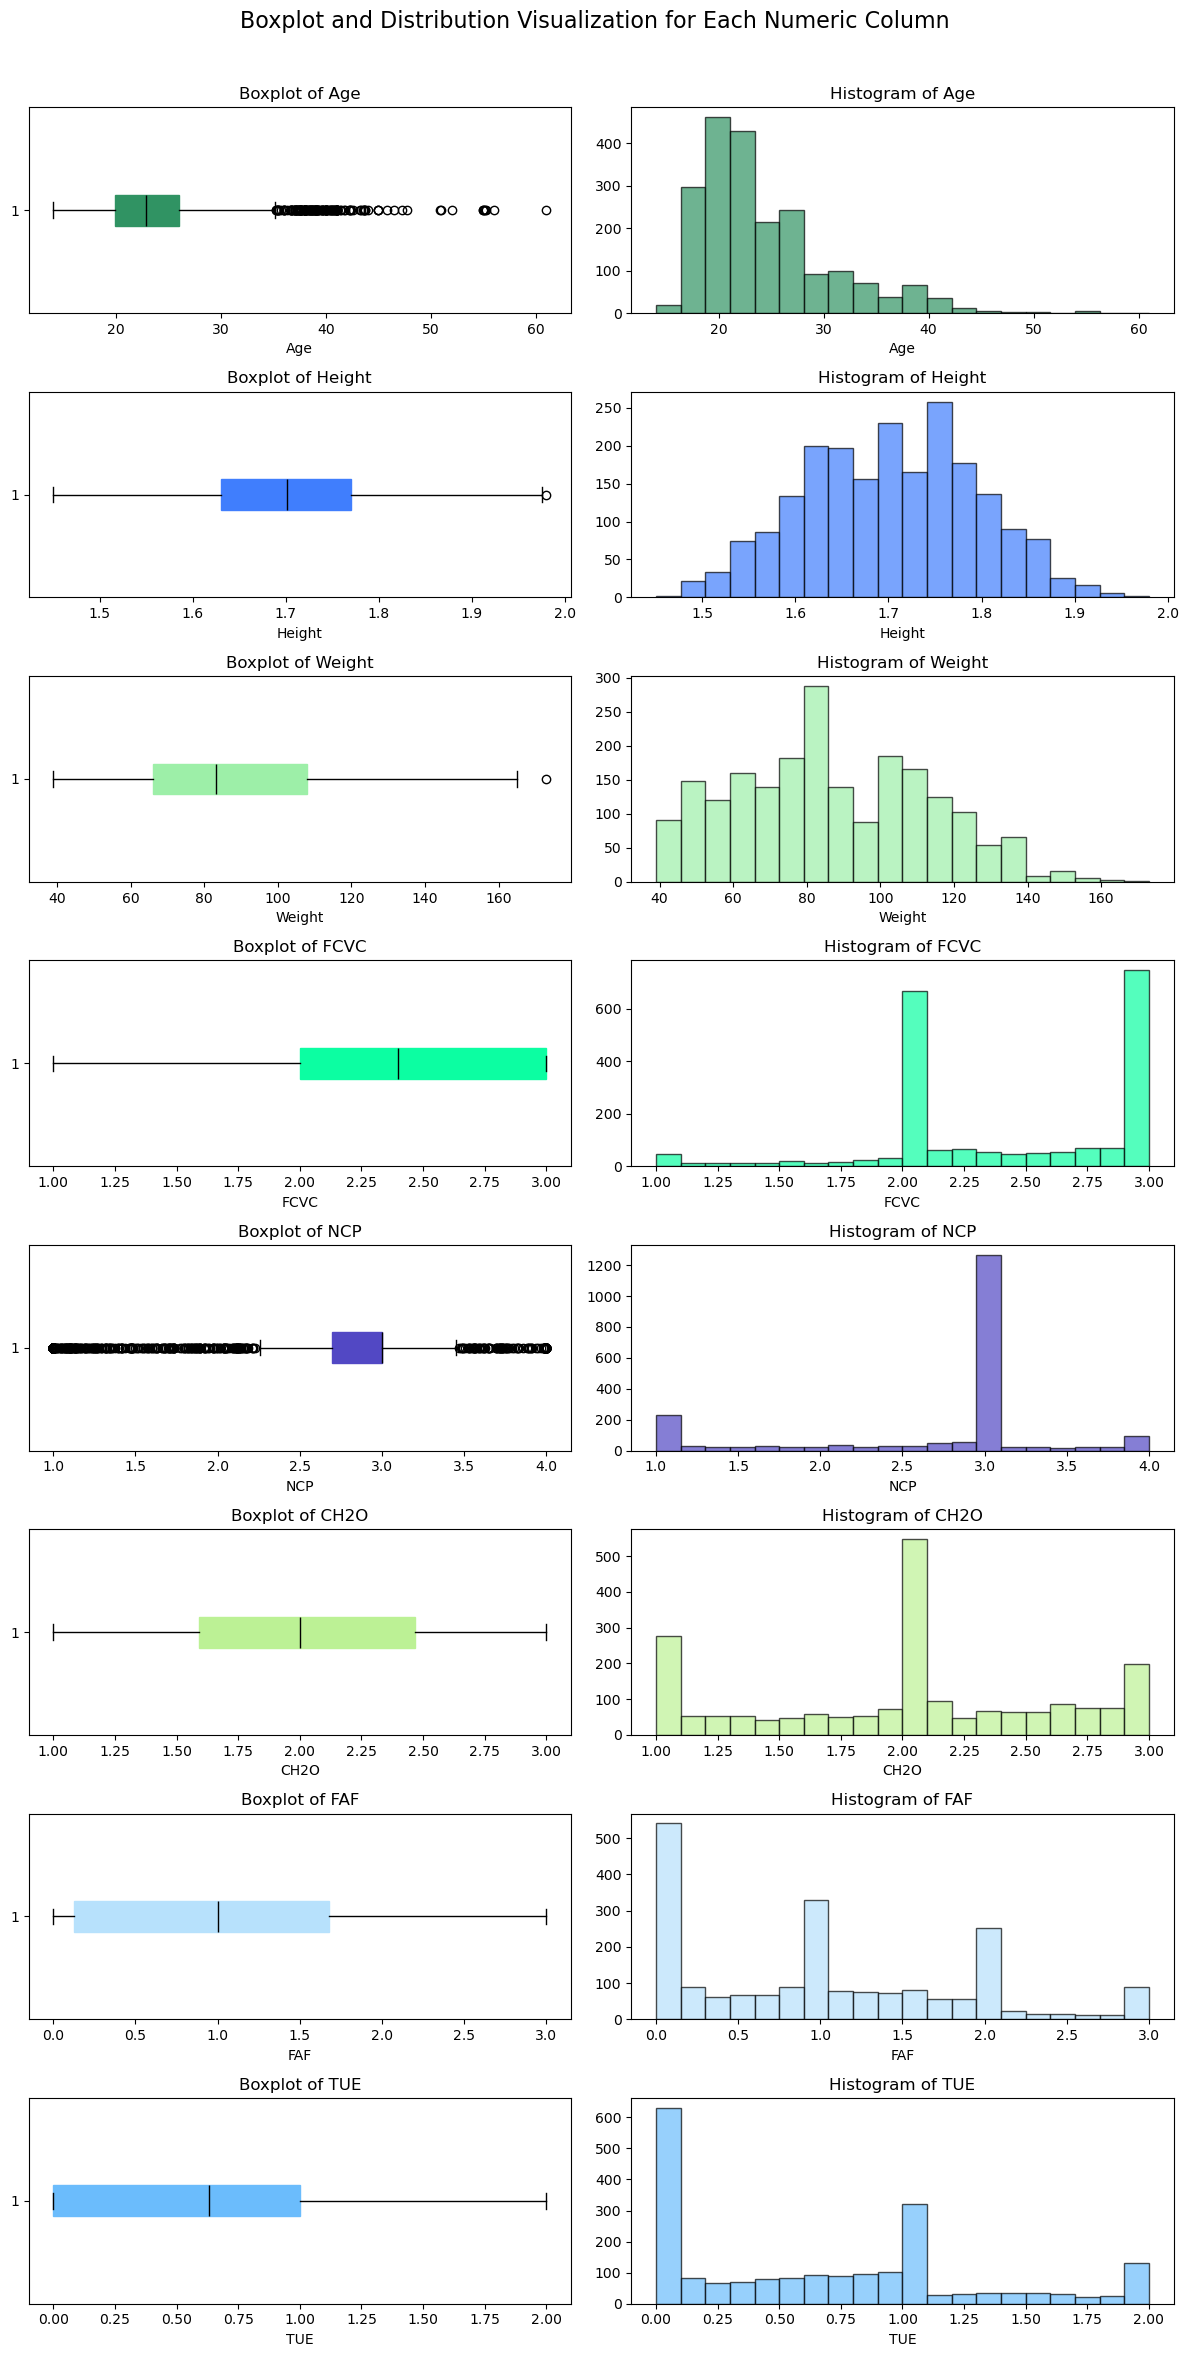

In [23]:
#titles for plots/figures
fig_titles = []

for colName in numeric_data.columns:
    fig_titles.append(f"Boxplot Of {colName}")
    fig_titles.append(f"Histogram Of {colName}")
    
#setting the colors for each column
def fill_color_generator():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return (r/255, g/255, b/255)

fill_color_dict = {}
for colName in numeric_data.columns:
    fill_color_dict[colName] = fill_color_generator()

# make subplot for each column name
num_rows = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 3))

# Flatten axes for easier indexing when there's more than 1 row
axes = axes if num_rows > 1 else [axes]

for i, column in enumerate(numeric_data.columns):
    color = fill_color_dict[column]

    # Boxplot
    axes[i][0].boxplot(numeric_data[column].dropna(), vert=False, patch_artist=True,
                       boxprops=dict(facecolor=color, color=color),
                       medianprops=dict(color="black"))
    axes[i][0].set_title(f"Boxplot of {column}")
    axes[i][0].set_xlabel(column)

    # Histogram
    axes[i][1].hist(numeric_data[column].dropna(), bins=20, color=color, alpha=0.7, edgecolor='black')
    axes[i][1].set_title(f"Histogram of {column}")
    axes[i][1].set_xlabel(column)

# Overall layout
fig.suptitle("Boxplot and Distribution Visualization for Each Numeric Column", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
plt.show()

There are some outliers in age, NCP, weight, and height. However most of the outliers are reasonable like in NCP which is the nummber of main meals consumed per day the range is 1 to 4 where the distribution mostly lies in 2.95 - 3 therefore the IQR and percentiles can be affected. The distributioin of FCVC, NCP, FAF, and TUE are skewed and might lead to a bad performance in the model since the skewed data might bring bias. From the boxplots, the *age* and *weight* column has different ranges from the rest of the dataset. we might need to scale it to prevent feature dominance in the data.

Note:
- Age would be scaled using robust scaler since the robust scatler is more resilient towards outliers
- Weight would be scaled using the standard scaler since the data is following the normal distribution

### Plotting the proportion for categorical data

In [24]:
categorical_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [25]:
# I will change the "Nobeyesdad" column to "Y" since we will predict y
categorical_data.rename(columns = {'NObeyesdad':'y'}, inplace = True)
categorical_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,y
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


then we will start counting the number of each record of unique categorical data

In [26]:
categorical_count = []

for col in categorical_data.columns:
    counts = categorical_data[col].value_counts().reset_index()
    counts.columns = [f"{col}_values", f"{col}_count"]  #Rename column names
    counts[f"{col}_values"] = counts[f"{col}_values"].astype(str)  #Make sure it is string
    
    categorical_count.append(counts)
    
count_result = pd.concat(categorical_count, ignore_index=True)
count_result

,Gender_values,Gender_count,family_history_with_overweight_values,family_history_with_overweight_count,FAVC_values,FAVC_count,CAEC_values,CAEC_count,SMOKE_values,SMOKE_count,SCC_values,SCC_count,CALC_values,CALC_count,MTRANS_values,MTRANS_count,y_values,y_count
0,Male,1052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,1035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,yes,1722.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,no,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,yes,1844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,no,243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,1761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Frequently,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Always,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,no,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Turns out there is so many NaN which is gwenchana because it will be ignored in the plot hehehe

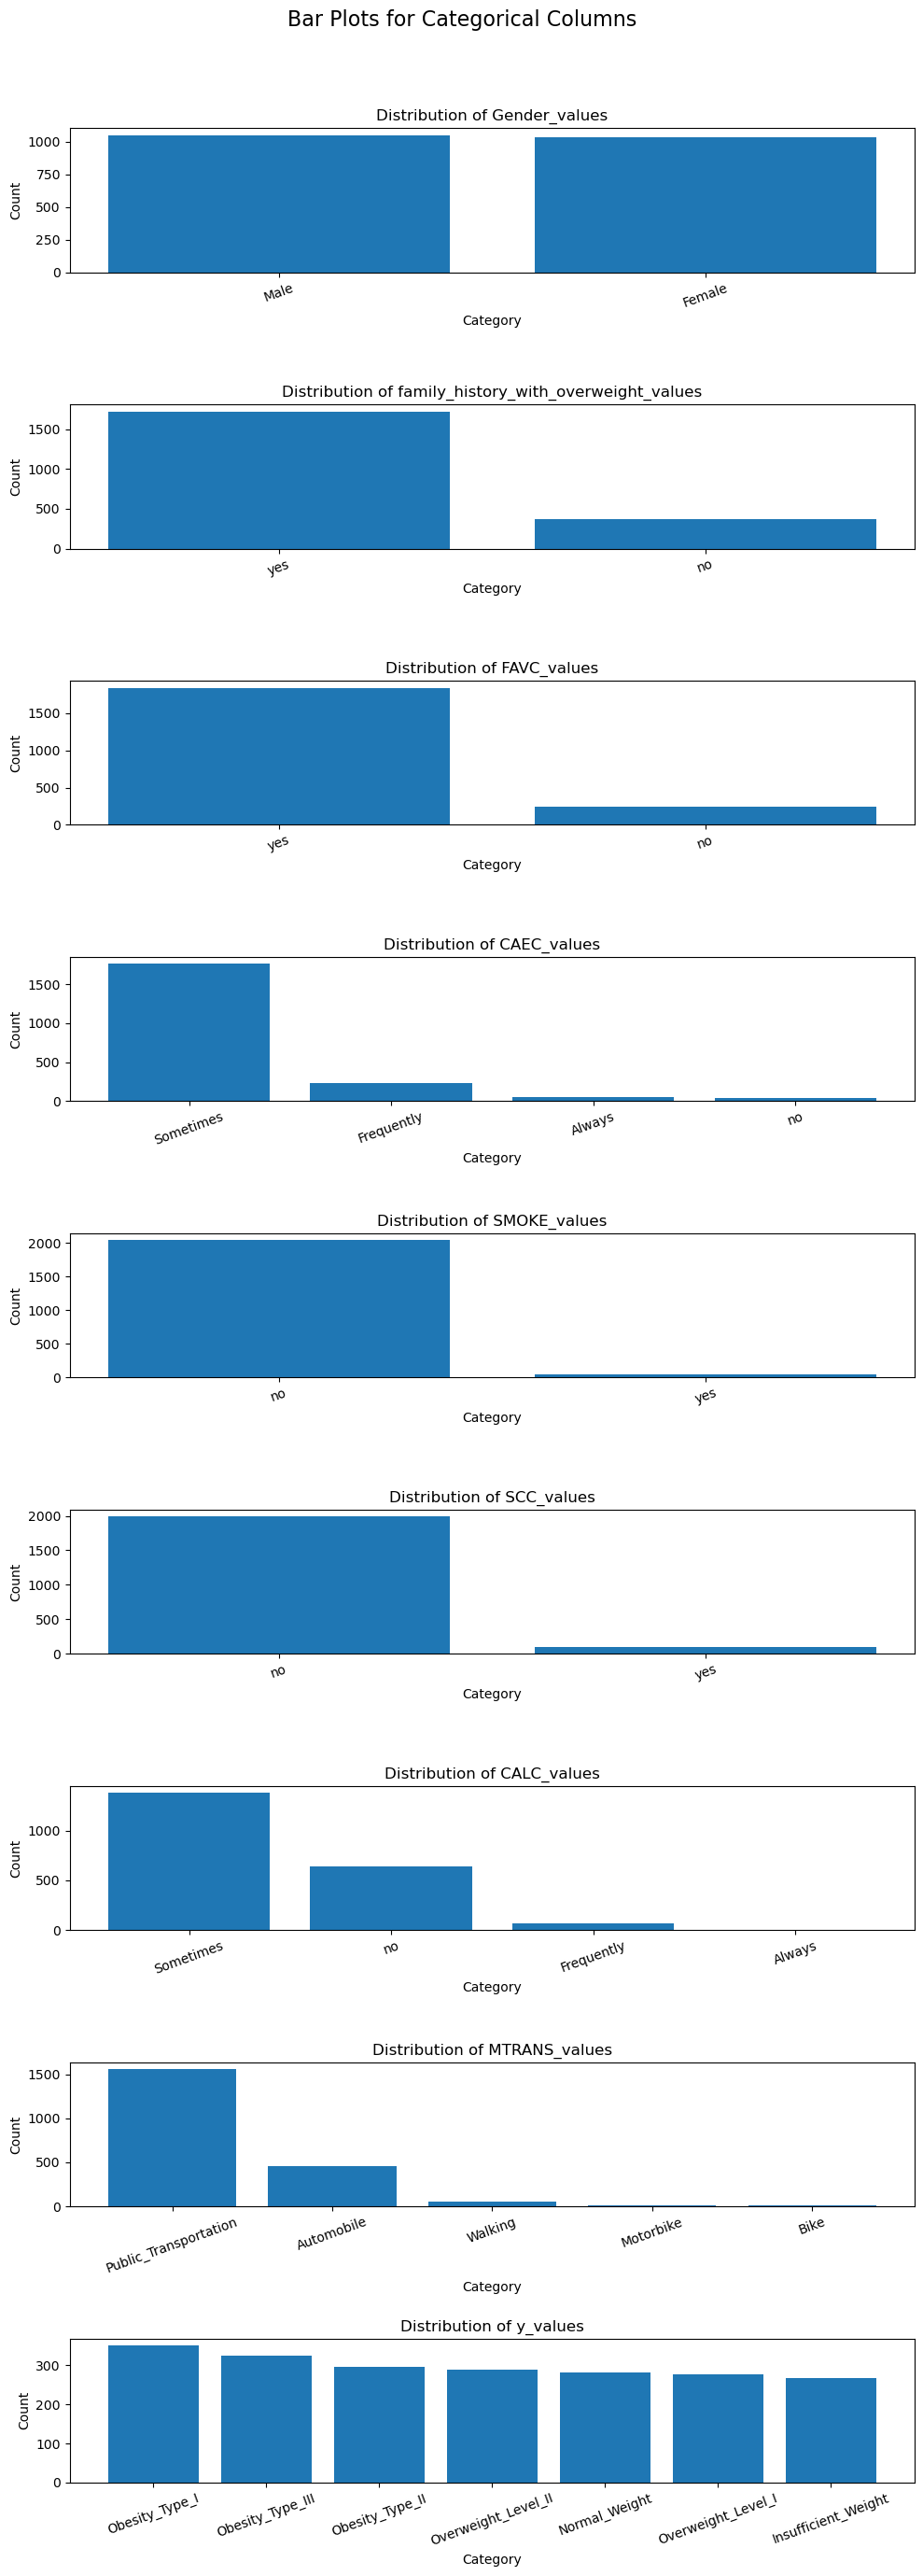

In [27]:
#get title and the counts
cat_fig_titles = []

for col in count_result.columns:
    if "_values" in col:
        cat_fig_titles.append(f"Distribution of {col}")
        
categoric_columns = [col for col in count_result.columns if "_values" in col]

# Create subplots: one row for each categorical column
num_rows = len(categoric_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, num_rows * 3), sharex=False)

# Flatten axes for easier handling if there's more than 1 row
axes = axes if num_rows > 1 else [axes]

# Plot each categorical distribution
for i, col in enumerate(categoric_columns):
    category_val = count_result[col].to_list()  # Get categorical values
    count = count_result[col.replace("_values", "_count")].to_numpy()  # Get count values
    
    #convert to string
    category_val = [str(val) for val in category_val]
    
    # Select the corresponding subplot axis
    ax = axes[i]
    
    # # Create the bar plot
    ax.bar(category_val, count)
    
    # Set title and labels
    ax.set_title(cat_fig_titles[i], fontsize=12)
    ax.set_ylabel("Count")
    ax.set_xlabel("Category")
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=20)

# Add an overall title and adjust layout
fig.suptitle("Bar Plots for Categorical Columns", fontsize=16, y=1.02)
fig.tight_layout(h_pad=2.0)  # Adjust spacing between rows
plt.show()


It is nice to see that the gender distribution and y_values is almost uniformly distributed. However the rest of the categorical features is not uniformly distributed.

### Correlation test

#### using spearman correlation test

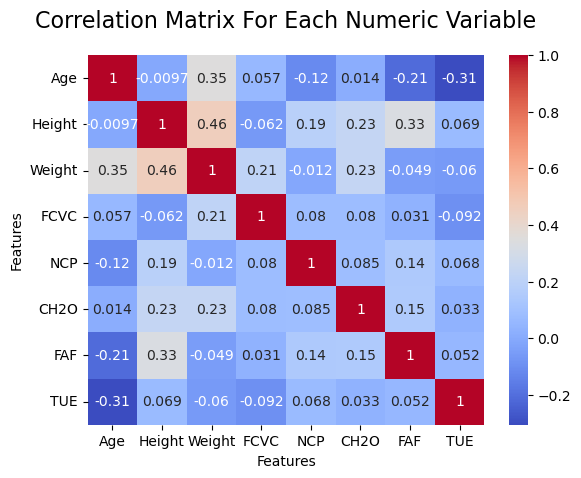

In [28]:
#Spearman correlation test will be used because the data is not distributed normally
#and the data is verry skewed based on the distribution plot

#Pearson is not used because pearsons method assumes the data is distributed normally
#Pearson is for measuring linear association strength
correlation_matrix = numeric_data.corr('spearman')

cor_plot = sns.heatmap(correlation_matrix, annot = True, cmap= "coolwarm")
plt.title("Correlation Matrix For Each Numeric Variable", fontsize = 16, pad = 20)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()



All the numeric data shows little to no correlation which is good so that there will be no bias due to correlation to our model.

#### VIF test

Checking the variance inflation factor to find out which features has the highest high multicollinearity.

In [1]:
vif_data = pd.DataFrame()

#numeric variable
vif_data["feature"] = numeric_data.columns

#calculating vif for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i)
                   for i in range(len(numeric_data.columns))]

print(vif_data)

NameError: name 'pd' is not defined

What is alerting is that the VIF of the Height is 70.18 which is the highest among the features.<a href = "https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/#:~:text=Generally%2C%20a%20VIF%20above%204,that%20needs%20to%20be%20corrected.">CFI Team (n.d.)</a> stated that VIF higher than 10 in other words tolerance is lower than 0.1 means there is significant milticollinearity that needs to be corrected.

But for now we will see how will the model reacts and the models withouth the height and with height will be compared.


## Data Preprocessing

### Encoding the categorical data's

In [30]:
for col in categorical_data.columns:
    print(f"{col}: {categorical_data[col].unique()} \n \n")

Gender: ['Female' 'Male'] 
 

family_history_with_overweight: ['yes' 'no'] 
 

FAVC: ['no' 'yes'] 
 

CAEC: ['Sometimes' 'Frequently' 'Always' 'no'] 
 

SMOKE: ['no' 'yes'] 
 

SCC: ['no' 'yes'] 
 

CALC: ['no' 'Sometimes' 'Frequently' 'Always'] 
 

MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] 
 

y: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 
 



I will use the one hot encoder for the nominal columns which is "MTRANS","Gender"

Ordinal encoder will be used for "CALC", "CAEC", "y"

And binary columns such as "family_history_with_overweight", "FAVC", "SMOKE", "SCC"

In [31]:
#encoding libraries

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [32]:
nominal_cols = ["MTRANS", "Gender"]
ordinal_cols = ["CALC", "CAEC", "y"]
bin_cols = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

#### Binary Encoding for ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

In [33]:
bin_enc = LabelEncoder()

In [34]:
binary_data = categorical_data[bin_cols]
binary_data

,family_history_with_overweight,FAVC,SMOKE,SCC
0,yes,no,no,no
1,yes,no,yes,yes
2,yes,no,no,no
3,no,no,no,no
4,no,no,no,no
...,...,...,...,...
2106,yes,yes,no,no
2107,yes,yes,no,no
2108,yes,yes,no,no
2109,yes,yes,no,no


In [35]:
#binary encode
bin_data_enc = binary_data.apply(bin_enc.fit_transform)
bin_data_enc

,family_history_with_overweight,FAVC,SMOKE,SCC
0,1,0,0,0
1,1,0,1,1
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2106,1,1,0,0
2107,1,1,0,0
2108,1,1,0,0
2109,1,1,0,0


#### One hot encoding for "MTRANS" and "Gender"

In [36]:
hot_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [37]:
nominal_cols_enc = hot_enc.fit_transform(categorical_data[nominal_cols])

#### Ordinal Encoder for "CALC", "CAEC", "y"

In [38]:
for cols in categorical_data[ordinal_cols].columns:
    print(f"{cols}: {categorical_data[cols].unique()}\n")

CALC: ['no' 'Sometimes' 'Frequently' 'Always']

CAEC: ['Sometimes' 'Frequently' 'Always' 'no']

y: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']



In [39]:
ord_enc_y = OrdinalEncoder(categories=[['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                                        'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']]).set_output(transform="pandas")

ord_enc_calc_caec = OrdinalEncoder(categories = [["no", "Sometimes", "Frequently", "Always"]]).set_output(transform="pandas")

In [40]:
y_enc = ord_enc_y.fit_transform(categorical_data[['y']])
y_enc

,y
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
2106,6.0
2107,6.0
2108,6.0
2109,6.0


In [41]:
CALC_enc = ord_enc_calc_caec.fit_transform(categorical_data[["CALC"]])
CAEC_enc = ord_enc_calc_caec.fit_transform(categorical_data[["CAEC"]])

#### Joing back the categorical data while encoding the nominal columns

In [42]:
categorical_data_enc = pd.concat([bin_data_enc,nominal_cols_enc,CALC_enc, CAEC_enc, y_enc], axis = 1)

### Reunite the Dataset

In [43]:
Encoded_dataset = pd.concat([numeric_data, categorical_data_enc], axis = 1)
Encoded_dataset.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,CALC,CAEC,y
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0


### Splitting data to train and test

#### Take out y variable

In [44]:
x = Encoded_dataset.drop(columns=["y"])

#### Split to train and test

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x, 
                                                 y_enc, 
                                                 test_size= 0.2, 
                                                 random_state= 42 #for reproducibility
                                                 )

### Scaling the **train** dataset

In [48]:
age_scaler = RobustScaler()
weight_scaler = StandardScaler()

In [49]:
x_train["Age"] = age_scaler.fit_transform(x_train[["Age"]])
x_train["Weight"] = weight_scaler.fit_transform(x_train[["Weight"]])

In [50]:
x_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,SCC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,CALC,CAEC
44,-0.304994,1.810000,-0.274109,1.00000,3.000000,2.000000,2.000000,0.000000,0,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
691,-0.800554,1.786758,-1.365851,2.91548,3.000000,1.777486,1.077469,1.000000,0,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
667,-0.074310,1.869098,-0.986799,3.00000,3.263201,2.233274,1.557737,0.000355,1,1,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
170,-0.139807,1.720000,-0.197429,2.00000,1.000000,2.000000,2.000000,1.000000,0,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
310,-0.965740,1.790000,-1.155920,2.00000,4.000000,2.000000,2.000000,1.000000,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0


### Scaling the **test** dataset

In [51]:
x_test["Age"] = age_scaler.transform(x_test[["Age"]])
x_test["Weight"] = weight_scaler.transform(x_test[["Weight"]])

In [52]:
x_test.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,SCC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,CALC,CAEC
1337,18.603496,1.681719,90.671871,1.524428,3.0,1.383831,0.130417,1.000000,1,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1763,31.199261,1.848845,125.077863,2.496190,3.0,1.662117,0.992371,0.217632,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
389,16.000000,1.610000,65.000000,1.000000,1.0,2.000000,0.000000,0.000000,1,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
595,17.210933,1.819557,58.325122,2.559600,4.0,2.000000,2.000000,0.331483,1,1,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1735,26.734476,1.816197,119.622764,2.247037,3.0,2.718408,0.763595,0.000000,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## Making the model

In this project, we will develop a neural network model as the primary approach since the task involves a multiclass classification problem with the following target classes: `'Normal_Weight'`, `'Overweight_Level_I'`, `'Overweight_Level_II'`, `'Obesity_Type_I'`, `'Insufficient_Weight'`, `'Obesity_Type_II'`, and `'Obesity_Type_III'`. Additionally, a **baseline model** using a random forest classifier will be implemented for performance comparison. Gridsearch would be applied to both models to search for the best parameters

### Random Forest (Baseline Model)

#### Build the random forest model

In [39]:
#Grid search setup
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10,20,30],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_grid = GridSearchCV(rf_grid,
                             gr_space,
                             cv = 3,
                             scoring='f1_macro',
                             verbose = 3,
                             n_jobs=-1 #all cores
                             )

In [40]:
#flatten the y_train
y_train = y_train.values.ravel()

In [41]:
rf_model_result = rf_model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


c:\Users\Panther\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [42]:
rf_best_params = rf_model_result.best_params_
print("Grid search result for optimal parameters: ")
for param in sorted(rf_best_params.keys()):
    print(f"{param}: {rf_best_params[param]}")

Grid search result for optimal parameters: 
max_depth: 20
max_features: 20
min_samples_leaf: 1
n_estimators: 200


##### Retrain best model

In [43]:
best_rf_model = RandomForestClassifier(max_depth= 20,
                                       max_features=10,
                                       min_samples_leaf=1,
                                       n_estimators=400
                                       )

In [ ]:
best_rf_model.fit(x_train,y_train)

#### Test The model

In [ ]:
y_test = y_test.values.ravel()

In [ ]:
rf_prediction = best_rf_model.predict(x_test)

##### Precision, Recall, F1 score, Accuracy

In [ ]:
test_precision = precision_score(y_test, rf_prediction, average="macro")
test_recall = recall_score(y_test, rf_prediction, average="macro")
test_f1 = f1_score(y_test, rf_prediction, average="macro")
test_accuracy = accuracy_score(y_test, rf_prediction)

print(f"Precision:\t{test_precision} \nRecall:\t\t{test_recall} \nF1_score:\t{test_f1}\nAccuracy:\t{test_accuracy}")

Precision:	0.9657126278893521 
Recall:		0.966299750342937 
F1_score:	0.9656640960852966
Accuracy:	0.9665071770334929


##### Confusion Matrix

predicted_class = ord_enc_segmentation.inverse_transform(test_preds.reshape(-1,1)).ravel()
actual_class = ord_enc_segmentation.inverse_transform(y_test.reshape(-1,1)).ravel() #make to 1D array

class_names = sorted(pd.unique(actual_class))

In [ ]:
rf_predicted = ord_enc_y.inverse_transform(rf_prediction.reshape(-1,1)).ravel()
actual_class = ord_enc_y.inverse_transform(y_test.reshape(-1,1)).ravel()

class_names = sorted(pd.unique(actual_class))

In [ ]:
rf_cm = pd.DataFrame(confusion_matrix(actual_class,
                         rf_predicted,
                         labels=class_names))
rf_cm

,0,1,2,3,4,5,6
0,56,3,0,0,0,0,0
1,2,57,0,0,0,2,0
2,0,0,68,0,0,0,2
3,0,0,0,64,0,0,0
4,0,0,0,0,60,0,0
5,0,4,0,0,0,50,1
6,0,0,0,0,0,0,49


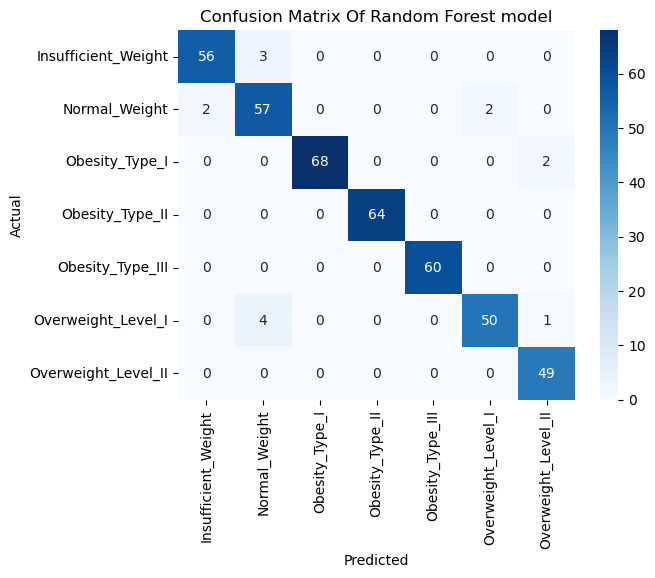

In [ ]:
sns.heatmap(
    rf_cm,
    cmap= "Blues",
    annot= True,
    fmt= "g",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Of Random Forest model")

plt.show()

### Neural Network Model (Purposed Model)

#### Build Neural Network Model

In [66]:
# Ensure y_train is one-hot encoded
y_train = to_categorical(y_train)

#define model
def create_model(optimizer='Adam', activation="relu"):
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer: number of classes
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#define gridsearch for neural network
nn_param_grid = {
    'optimizer' : ['Adam', 'Adadelta', 'SGD', 'Adagrad'],
    'activation' : ['relu', 'gelu', 'exponential', 'linear', 'sigmoid'],
    'epochs': [100, 300, 500],
    'batch_size': [32, 64, 128] 
}

# Create KerasClassifier wrapper for use with GridSearchCV
nn_model = KerasClassifier(build_fn=create_model)

# Create GridSearchCV
nn_grid_search = GridSearchCV(estimator=nn_model,
                              param_grid=nn_param_grid,
                              cv=3)

C:\Users\Panther\AppData\Local\Temp\ipykernel_1980\723861036.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_model)


In [67]:
from keras.utils import to_categorical
y_train_categoric = to_categorical(y_train)

In [68]:
nn_model_result = nn_grid_search.fit(x_train, y_train)

ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Panther\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Panther\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 246, in fit
    raise ValueError("Invalid shape for y: " + str(y.shape))
ValueError: Invalid shape for y: (1112, 7, 2)

--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Panther\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Panther\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 246, in fit
    raise ValueError("Invalid shape for y: " + str(y.shape))
ValueError: Invalid shape for y: (1113, 7, 2)


##### Retrain Best Model

In [ ]:
nn_model_result.best_params_

In [57]:
def nn_best(optimizer='Adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer = "Adam",
                  loss='categorical_crossentropy',
                  metrics=["accuracy"]
                  )

    return model

nn_model_best = KerasClassifier(build_fn=nn_best)

C:\Users\Panther\AppData\Local\Temp\ipykernel_1980\3922508462.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model_best = KerasClassifier(build_fn=nn_best)


In [58]:
nn_model_best.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    batch_size = 32
)

Epoch 1/100
53/53 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 2/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 7/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 8/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 9/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1324
Epoch 10/100
53/53 [==============================] - 0s 4ms/step - loss:

#### Test the model

##### Precision, Recall, F1 score, Accuracy

In [59]:
nn_prediction = nn_model_best.predict(x_test)

14/14 [==============================] - 0s 3ms/step


In [60]:
test_precision = precision_score(y_test, nn_prediction, average="macro")
test_recall = recall_score(y_test, nn_prediction, average="macro")
test_f1 = f1_score(y_test, nn_prediction, average="macro")
test_accuracy = accuracy_score(y_test, nn_prediction)

print(f"Precision:\t{test_precision} \nRecall:\t\t{test_recall} \nF1_score:\t{test_f1}\nAccuracy:\t{test_accuracy}")

Precision:	0.020847573479152427 
Recall:		0.14285714285714285 
F1_score:	0.03638532657321802
Accuracy:	0.145933014354067


c:\Users\Panther\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Confusion Matrix

In [62]:
nn_predicted = ord_enc_y.inverse_transform(nn_prediction.reshape(-1,1)).ravel()
actual_class = ord_enc_y.inverse_transform(y_test.reshape(-1,1)).ravel()

class_names = sorted(pd.unique(actual_class))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [63]:
nn_cm = pd.DataFrame(confusion_matrix(y_true=actual_class, 
                                      y_pred=nn_predicted,
                                      labels=class_names))
nn_cm

NameError: name 'actual_class' is not defined

In [64]:
sns.heatmap(
    nn_cm,
    cmap= "Blues",
    annot= True,
    fmt= "g",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Of Neural Network model")

plt.show()

NameError: name 'nn_cm' is not defined